In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


### Example data load

In [2]:
url = 'https://raw.githubusercontent.com/JunetaeKim/DeepLearningClass/main/Dataset/ThoraricSurgery.csv'
#Data = np.loadtxt('ThoraricSurgery.csv', delimiter=',')
Data = np.loadtxt(url, delimiter=',')

### Splitting data into input and output

In [3]:
X = Data[:, :17]
Y = Data[:, 17]
X.shape, Y.shape

((470, 17), (470,))

### Sequential API

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [5]:
## Instantiation
model = keras.models.Sequential()

In [6]:
## Input layer with 17 features
model.add(keras.Input(shape=(X.shape[-1],)))


In [7]:
## Hidden layer 1 with a 2D wiegh matrix (17 , 10) and a 2D bias matrix (1, 10)
model.add(Dense(10, activation='relu'))

In [8]:
## Hidden layer 2 with a 2D wiegh matrix (10 , 5) and a 2D bias matrix (1, 5)
model.add(Dense(5, activation='relu'))

In [9]:
## Output layer a 2D wiegh matrix (5 , 1) and a 2D bias matrix (1, 1)
model.add(Dense(1, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                180       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


 ### Compliling the model
 #### You need to sepcify the loss function and the optimizer

In [11]:
model.compile(loss='BCE', optimizer='adam')

In [12]:
model.fit(X,Y, validation_split=0.2, epochs=50, batch_size=200)
Logs = model.history.history

Epoch 1/50
2/2 [==============================] - 3s 2s/step - loss: 5.0303 - val_loss: 5.9054
Epoch 2/50
2/2 [==============================] - 0s 53ms/step - loss: 4.8387 - val_loss: 5.7869
Epoch 3/50
2/2 [==============================] - 0s 52ms/step - loss: 4.7235 - val_loss: 5.6650
Epoch 4/50
2/2 [==============================] - 0s 60ms/step - loss: 4.7799 - val_loss: 5.5456
Epoch 5/50
2/2 [==============================] - 0s 62ms/step - loss: 4.7257 - val_loss: 5.4255
Epoch 6/50
2/2 [==============================] - 0s 59ms/step - loss: 4.5781 - val_loss: 5.3042
Epoch 7/50
2/2 [==============================] - 0s 59ms/step - loss: 4.3669 - val_loss: 5.1867
Epoch 8/50
2/2 [==============================] - 0s 61ms/step - loss: 4.2487 - val_loss: 5.0698
Epoch 9/50
2/2 [==============================] - 0s 58ms/step - loss: 4.2396 - val_loss: 4.9553
Epoch 10/50
2/2 [==============================] - 0s 60ms/step - loss: 4.0217 - val_loss: 4.8397
Epoch 11/50
2/2 [==============

### Visualization of losses

In [13]:
import matplotlib.pyplot as plt


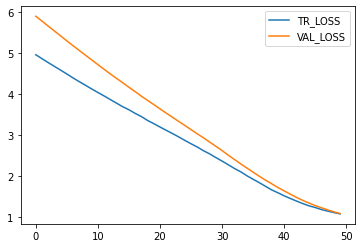

In [14]:
plt.plot(Logs['loss'], label='TR_LOSS')
plt.plot(Logs['val_loss'], label='VAL_LOSS')
plt.legend()